In [1]:
# install dependencies

%pip install -q IPython
%pip install -q ipywidgets

from IPython.display import clear_output
clear_output()

In [2]:
# Load the Ultimate Sprint Report library

from IPython.display import clear_output
import requests
import nbconvert
import nbformat
import time

class UltimateSprintReport:
	pass # Temp class to stop error

source, _ = (nbconvert.PythonExporter()
	.from_notebook_node(nbformat.reads((requests
		.get(f'https://raw.githubusercontent.com/maddogmikeb/Jira/refs/heads/master/UltimateSprintReport.ipynb?_t={int(time.time())}' )
		.text), as_version=4))
)
exec(source)

clear_output()

In [3]:
from IPython.display import HTML, display

try:
	from google.colab import userdata
	host = userdata.get("ATLASSIAN_HOST")
	username = userdata.get("ATLASSIAN_USERNAME")
	api_key = userdata.get("ATLASSIAN_APIKEY")
	zephyr_api = userdata.get("ZEPHYR_SCALE_APIKEY")
except:
	import os
	Warning("Not using google colab - defaulting to normal environment variables")
	host = os.getenv("ATLASSIAN_HOST")
	username = os.getenv("ATLASSIAN_USERNAME")
	api_key = os.getenv("ATLASSIAN_APIKEY")
	zephyr_api = os.getenv("ZEPHYR_SCALE_APIKEY")
	pass

if host[-1] != "/":
	host += "/"

report = UltimateSprintReport(
	username=username, password=api_key, jira_url=host
)

if not report.connected():
  raise Exception("Error while connecting to Jira")

display(HTML(report.show_login_details()))

Currently logged in as:,Mike Burns


Loading Sprint Details:   0%|          | 0/100 [00:00<?, ?it/s]

Loading Zephyr Test Cases:   0%|          | 0/22 [00:00<?, ?issue/s]


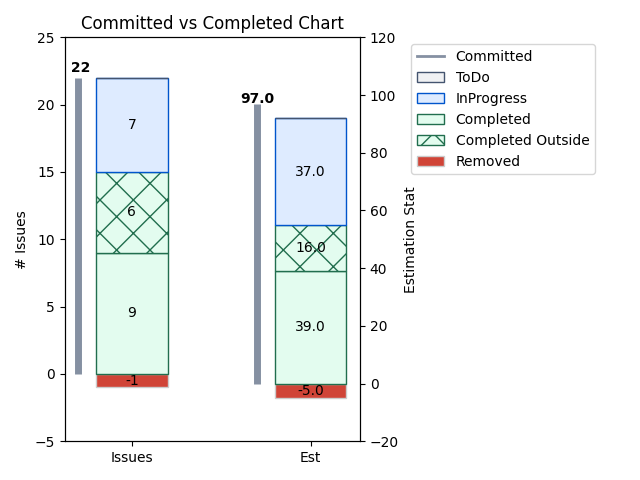
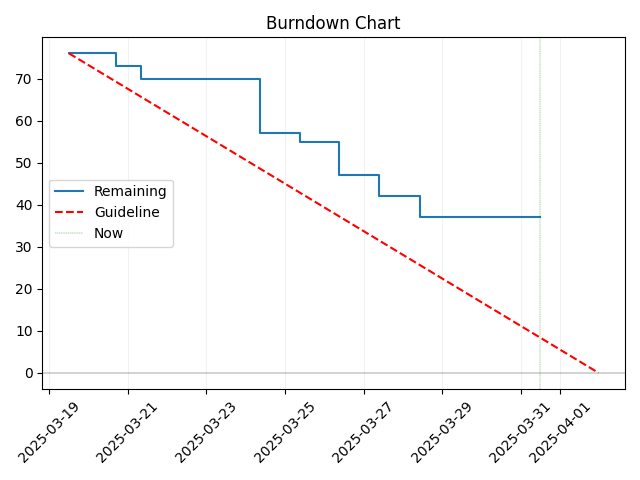

In [4]:
from IPython.display import HTML, display

boardId = 364
sprintId = 945
project = "FDSEWMSR"

report.load(host, project, boardId, sprintId)

""" Alternatively, you can load the report by specifying the 'classic' sprint report url """
"""
sprint_url = f"{host}jira/software/c/projects/{project}/boards/{boardId}/reports/sprint-retrospective?sprint={sprintId}"
report.load_url(sprint_url)
"""

if zephyr_api != None:
    report.load_sprint_zephyr_test_cast_statistics(zephyr_api)

display(HTML(report.show_report()))

Loading Sprint Details:   0%|          | 0/100 [00:00<?, ?it/s]

Loading Zephyr Test Cases:   0%|          | 0/28 [00:00<?, ?issue/s]


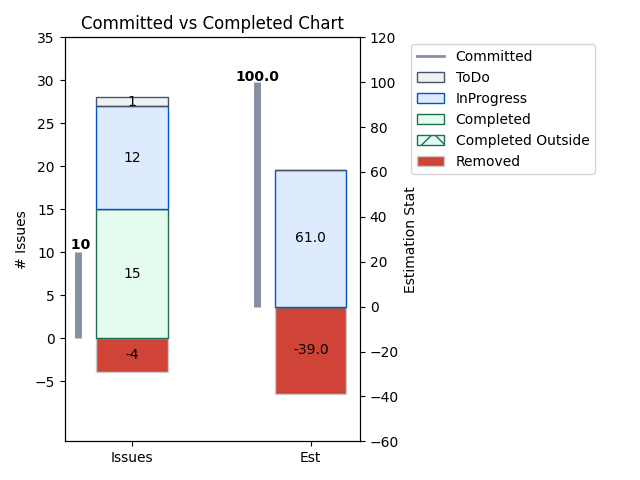
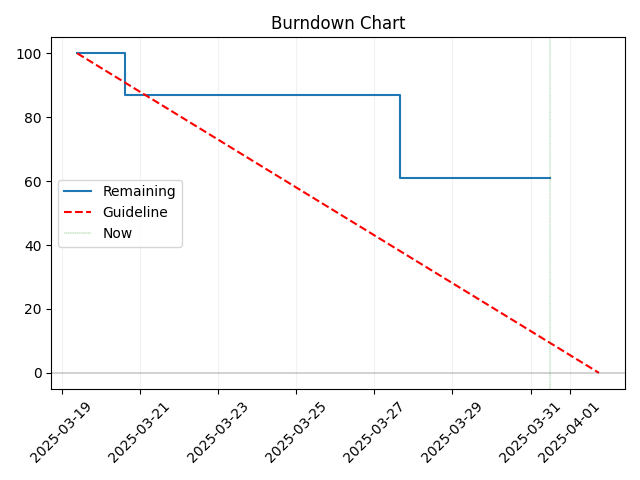

In [5]:
from IPython.display import HTML, display

boardId = 401
sprintId = 953
project = "FDSEWMSR"

report.load(host, project, boardId, sprintId)

""" Alternatively, you can load the report by specifying the 'classic' sprint report url """
"""
sprint_url = f"{host}jira/software/c/projects/{project}/boards/{boardId}/reports/sprint-retrospective?sprint={sprintId}"
report.load_url(sprint_url)
"""

if zephyr_api != None:
    report.load_sprint_zephyr_test_cast_statistics(zephyr_api)

display(HTML(report.show_report()))